# Modificaciones del método de euler

In [1]:
using PyPlot

__Ejercicio 1:__ Implementar método implicito de Euler como quieran.

__solución:__ empezamos modificando el método de newton con la derivada simétrica

In [3]:
function ds(f,x0,h)
    D = (f(x0+h)-f(x0-h))./(2*h)    
    return D                        
end

ds (generic function with 1 method)

In [4]:
function newton(g,x0,h)
    dg(z) = ds(g,z,h)  # Aproximación de la derivada usando derivada simétrica
    x = x0;                            # Condición inicial
    for i in 1:10
        x = x-g(x)/dg(x)               # método de newton
    end
    return x                           
end

newton (generic function with 1 method)

In [5]:
doc"""
esta función usa método de euler implícito para aproximar soluciones a la ecuación $\dot{x}=f(x,t)$ con la condición inicial x0, por favor introduzca (f,x0,h) donde las h's serviran para aproximar y por tanto puede ser un conjunto de valores
"""
function euler_im(f,x0,h0)    
    n = length(h0)                    # Número de h's
    x = zeros(n)                     # este guardará las aproximaciones en x
    x[1] = x0                        # condición inicial.
    h = h0[2]-h0[1]                # longitud de "salto"
    for k in 1:n-1
        yk = x[k]                    # yk es el k-ésimo elemento de x
        t = h0[k+1]                   # t representa la (k+1)-ésimo elemento de h
            g(z) = z - yk - h*f(z,t)     # g es la función a la que deseamos encontrar su raíz x_(k+1).
            x[k+1] = newton(g,yk,h)  # Método de Newton con g agregando a x la aproximación x_(k+1).
    end
    return x                         # devolvemos los valores de aproximación
end

euler_im

__Ejercicio 2:__ Implementar Euler: Regla del punto medio.

__solución:__ solo haremos modificaciones en la regla de recurrencia pues es básicamente lo mismo, solo que se cambia 
$$x_{k+1}=x_{k}+hf\left(\tilde{x}_{k+\frac{1}{2}},t_{k+\frac{1}{2}}\right),$$
donde  $\displaystyle t_{k+\frac{1}{2}}=t_{k}+\frac{h}{2}$ y $\displaystyle\tilde{x}_{k+\frac{1}{2}}=x_{k}+\frac{h}{2}f(x_{k},t_{k})$.

In [6]:
doc"""
esta función aproxima soluciones a la ecuación $\dot{x}=f(x,t)$ mediante euler punto medio, introduzca (f,condición inicial, h)
"""
function eulerpm(f,x0,h)
    
    n = length(h)                               # numero de h's
    x = zeros(n)                                # guarda valores de x
    x[1] = x0                                   # aplicamos condiciones iniciales
    d = (h[2]-h[1])/2.0                     # ponemos nuestro paso medio
    for i in 1:n-1
        y = x[i] + d*f(x[i],h[i])       # aplicamos las fórmulas
        x[i+1] = x[i] + 2d*f(y,h[i]+d)
    end
    return x 
end

eulerpm

__Ejercicio 3:__ Implementar método de Runge-Kutta de orden 4.

__solución:__ antes de pasar a mostrar el programa y por tanto a aplicar el método, recordemos que en este método se usa:
$$x_{n+1}=x_{n}+\frac{h}{6}\left(k_{1}+2k_{2}+2k_{3}+k_{4}\right)$$
en donde
$$
\left\{\begin{array}{rcl}
k_{1} & = & f\left(x_{n},t_{n}\right)\\
k_{2} & = & f\left(x_{n}+\frac{h}{2}k_{1},t_{n}+\frac{h}{2}\right)\\
k_{3} & = & f\left(x_{n}+\frac{h}{2}k_{2},t_{n}+\frac{h}{2}\right)\\
k_{4} & = & f\left(x_{n}+hk_{3},t_{n}+h\right)
\end{array}\right..
$$

In [7]:
doc"""
esta función aplica método de runge-kutta de orden 4 a la ecuación $\dot{x}=f(x,t)$ introduzca (f,condición inicial,h{aproximación})
"""
function Runge4(f,x0,h0) 
    n = length(h0)                                  # elementos en h
    x = zeros(n)                                   # guarda aproximaciones en x
    x[1] = x0                                      # condición inicial en x
    h = (h0[2]-h0[1])/2.0                        # espaciamiento
    for i in 1:n-1
        k1 = f(x[i],h0[i])
        k2 = f(x[i]+h*k1,h0[i]+h)
        k3 = f(x[i]+h*k2,h0[i]+h)
        k4 = f(x[i]+2h*k3,h0[i]+2h)
        x[i+1] = x[i]+(h/3.0)*(k1+2k2+2k3+k4)  # aplicamos el método
    end
    return x
end

Runge4

__Ejercicio 4:__ Repita el ejercicio 1 del notebook anterior (Julia_6) y discuta los resultados respecto a lo que obtuvo con el método implícito.

__solución:__ en la tarea anterior se tenía lo siguiente:
$$\frac{dx}{dt}=-2.5x, \: x_{0}=x(0)=1\text{ y }2, \text{ y } t\in(0,8),$$
para los pasos $h=1.0,0.5,0.2,0.01$. Cuya solución exacta es:
$$x(t)=x_{0}e^{-2.5t}.$$
Ahora se usará el método de Euler implícito para aproximar la ecuación diferencial.

In [8]:
f(x,t)=-2.5x;

In [9]:
a1=0:1:8#este es el caso de h=1
i1=euler_im(f,1,a1)

9-element Array{Float64,1}:
 1.0        
 0.285714   
 0.0816327  
 0.0233236  
 0.00666389 
 0.00190397 
 0.000543991
 0.000155426
 4.44074e-5 

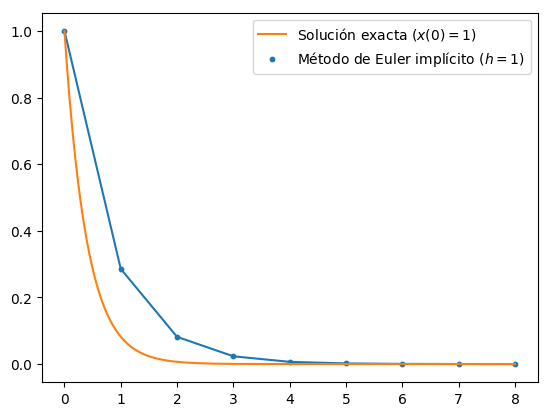

In [10]:
scatter(a1,i1,label=L"Método de Euler implícito ($h=1$)",s=10)
plot(a1,i1)
t=linspace(0,8,1000)#definimos un lisnpace para poder graficar la solución exacta
plot(t,exp.(-2.5*t),label=L"Solución exacta ($x(0)=1$)")#metemos la función solución exacta
legend()
show();

In [11]:
a2=0:0.5:8;                            # h=0.5.
a3=0:0.2:8;                            # h=0.2.
a4=0:0.01:8;                           # h=0.01
i2=euler_im(f,1,a2);
i3=euler_im(f,1,a3);
i4=euler_im(f,1,a4);

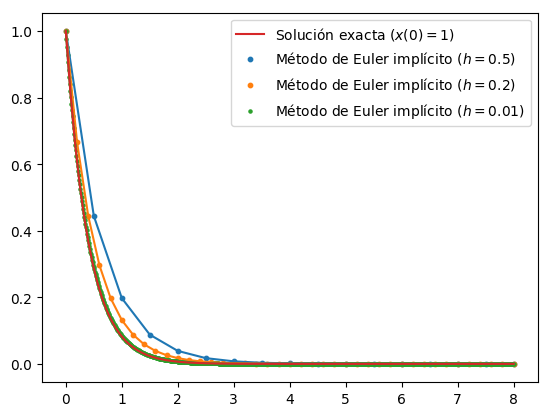

In [12]:
scatter(a2,i2,label=L"Método de Euler implícito ($h=0.5$)",s=10)
plot(a2,i2)
scatter(a3,i3,label=L"Método de Euler implícito ($h=0.2$)",s=10)
plot(a3,i3)
scatter(a4,i4,label=L"Método de Euler implícito ($h=0.01$)",s=5)
plot(a4,i4)
t=linspace(0,8,100)
plot(t,exp.(-2.5*t),label=L"Solución exacta ($x(0)=1$)")
legend()
show();

In [13]:
I1=euler_im(f,2,a1)#aplicamos ahora con la condición x(0)=2
I2=euler_im(f,2,a2)
I3=euler_im(f,2,a3)
I4=euler_im(f,2,a4)

801-element Array{Float64,1}:
 2.0       
 1.95122   
 1.90363   
 1.8572    
 1.8119    
 1.76771   
 1.72459   
 1.68253   
 1.64149   
 1.60146   
 1.5624    
 1.52429   
 1.48711   
 ⋮         
 6.91672e-9
 6.74802e-9
 6.58343e-9
 6.42286e-9
 6.26621e-9
 6.11337e-9
 5.96427e-9
 5.8188e-9 
 5.67687e-9
 5.53841e-9
 5.40333e-9
 5.27154e-9

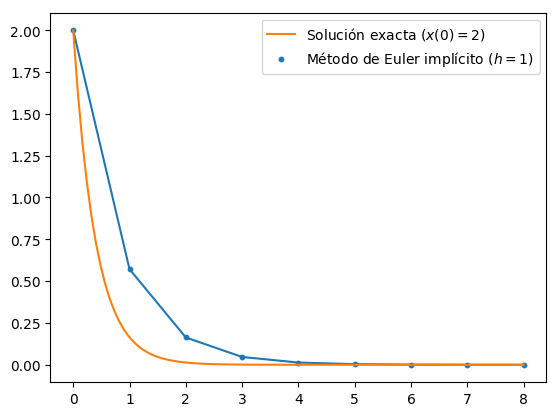

In [14]:
scatter(a1,I1,label=L"Método de Euler implícito ($h=1$)",s=10)
plot(a1,I1)
plot(t,2exp.(-2.5*t),label=L"Solución exacta ($x(0)=2$)")
legend()
show();

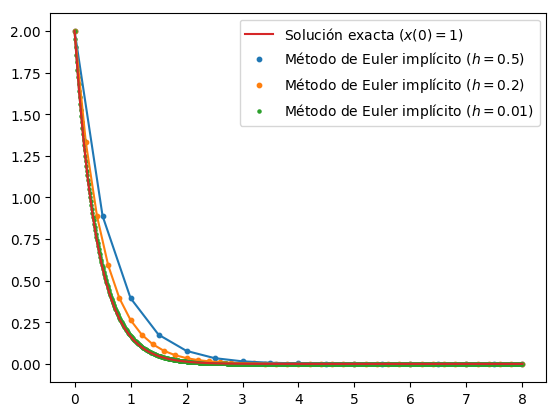

In [15]:
scatter(a2,I2,label=L"Método de Euler implícito ($h=0.5$)",s=10)
plot(a2,I2)
scatter(a3,I3,label=L"Método de Euler implícito ($h=0.2$)",s=10)
plot(a3,I3)
scatter(a4,I4,label=L"Método de Euler implícito ($h=0.01$)",s=5)
plot(a4,I4)
plot(t,2exp.(-2.5*t),label=L"Solución exacta ($x(0)=1$)")
legend()
show();

con el método implicito al comparar con el método original se nota mejoría desde el primer valor para $h$, puesto que es mas uniforme, por decirlo de un modo más formal, pareciera que la convergencia de las soluciones aproximadas (llamemoslas:) $x_h$ es uniforme, es decir $\{x_h\}$ converge uniformemente a la solución exacta, mientras que las del método original solo lo hacen de manera puntual

__Ejercicio 6__: Usar el método del punto medio y de Runge-Kutta para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Compare su respuesta con la solución exacta: $4+8t-5t^2$. notén que $x(0)=4$.

__solución:__ahora solo aplicaremos el método de punto medio y runge-kutta de orden 4, es decir, básicamente metemos en las funciones ya creadas el valor inicial 4 para algunos valores de h que queramos

In [16]:
f(x,t)=(2x-18t)/(1+t)#creamos nuestra función

f (generic function with 1 method)

In [17]:
b1=0:0.5:2           #tomamos h=0.5 en el intervalo [0,2]
b2=0:0.2:2           #h=0.2
b3=0:0.05:2
m1=eulerpm(f,4,b1)
m2=eulerpm(f,4,b2)
m3=eulerpm(f,4,b3)

41-element Array{Float64,1}:
 4.0      
 4.3878   
 4.75063  
 5.08846  
 5.40131  
 5.68918  
 5.95206  
 6.18996  
 6.40287  
 6.5908   
 6.75374  
 6.8917   
 7.00467  
 ⋮        
 5.10255  
 4.7658   
 4.40406  
 4.01734  
 3.60563  
 3.16894  
 2.70726  
 2.2206   
 1.70895  
 1.17232  
 0.610702 
 0.0241002

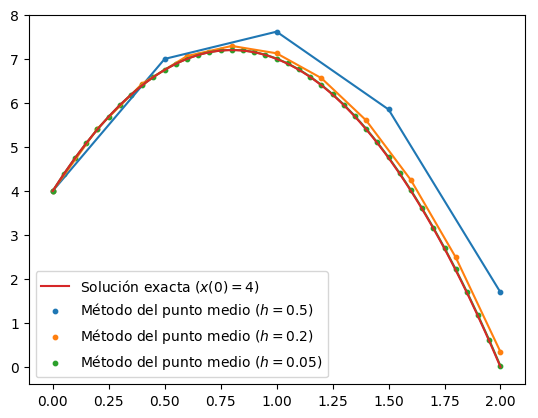

In [18]:
scatter(b1,m1,label=L"Método del punto medio ($h=0.5$)",s=10)
plot(b1,m1)
scatter(b2,m2,label=L"Método del punto medio ($h=0.2$)",s=10)
plot(b2,m2)
scatter(b3,m3,label=L"Método del punto medio ($h=0.05$)",s=10)
plot(b3,m3)
t=linspace(0,2,1000)#creamos un lisnpace que ayude a graficar
plot(t,-5t.^2+8t+4,label=L"Solución exacta ($x(0)=4$)")
legend()
show();

aqui se puede notar un comportamiento parecido a lo ya mencionado para el método de euler implícito, se nota más facilmente una convergencia uniforme usando el punto medio

In [19]:
r1=Runge4(f,4,b1)
r2=Runge4(f,4,b2)
r3=Runge4(f,4,b3)

41-element Array{Float64,1}:
 4.0       
 4.3875    
 4.75      
 5.0875    
 5.4       
 5.6875    
 5.95      
 6.1875    
 6.4       
 6.5875    
 6.75      
 6.8875    
 7.0       
 ⋮         
 5.08751   
 4.75001   
 4.38751   
 4.00001   
 3.58751   
 3.15001   
 2.68751   
 2.20001   
 1.68751   
 1.15002   
 0.587516  
 1.63198e-5

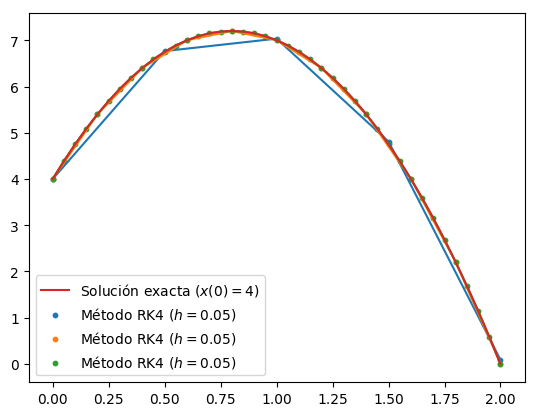

In [20]:
scatter(b1,r1,label=L"Método RK4 ($h=0.05$)",s=10)
plot(b1,r1)
scatter(b2,r2,label=L"Método RK4 ($h=0.05$)",s=10)
plot(b2,r2)
scatter(b3,r3,label=L"Método RK4 ($h=0.05$)",s=10)
plot(b3,r3)
plot(t,-5t.^2+8t+4,label=L"Solución exacta ($x(0)=4$)")
legend()
show();

con runge-kutte de inmediato se nota la aproximación uniforme a la solución exacta, por tanto se puede concluir que los método en cuanto a eficacia(al menos en este caso) es $euler\rightarrow\ euler\ implícito\rightarrow\ punto\ medio\rightarrow\ runge-kutta\ orden\ 4$

__Ejercicio 7__: Grafique la energía total del oscilador harmonico usando los métodos explícito de Euler y Runge-Kutta de orden 4. Compare sus respuestas y discuta.


__solución:__ ahora queremos calcular la energía total del OA
$$\ddot{x}=-kx,\:k>0$$
en nuestro caso usaremos $m=1=k$ y con las condiciones inciales $x(0)=1,\dot{x}(0)=-1$ y solo nos dijaremos en un periodo, es decir en el intervalo $[0,2\pi]$

In [21]:
function euler(f,x0,h0)#creamos una función que no depende de la dimensión de h
     y = x0
     h = h0[2]-h0[1]
     x=[]
     push!(x,y)
     for i in 2:length(h0)
        t = h0[i]
        y = y + f(y,t)*h
        push!(x,y) 
     end
     return x
end

euler (generic function with 1 method)

In [22]:
function RK_4(f,listt,x0)
     x = x0
     l = (listt[2]-listt[1])/2.0
     listx=[]
     push!(listx,x)
     for i in 2:length(listt)
        t = listt[i]
        k1 = f(x,t)
        k2 = f(x+l*k1,t+l)
        k3 = f(x+l*k2,t+l)
        k4 = f(x+2l*k3,t+2l)
        x += (l/3.0)*(k1+2k2+2k3+k4)
        push!(listx,x) 
     end
     return listx
end

RK_4 (generic function with 1 method)

In [23]:
X(t)=cos(t)-sin(t)#escribimos la soluciones exactas
V(t)=-sin(t)-cos(t)

V (generic function with 1 method)

Sabemos que si tomamos $v(t)=\dot{x}(t)$, entonces:
$$\left\{\begin{array}{ll}
\dot{x}=v, & x_{0}=x(0)\\
\dot{v}=-kx, & v_{0}=\dot{x}(0)
\end{array}\right.$$

Es decir $\mathbf{x}(t)=(x(t),v(t))$ y $\:\boldsymbol{f}(\mathbf{x},t)=(v(t),-kx(t))$, entonces:

$$\frac{d\mathbf{x}}{dt}=\boldsymbol{f}(\mathbf{x},t),$$

con la condición inicial $\mathbf{x}_{0}=\mathbf{x}(0)$. En nuestro caso $\:\boldsymbol{f}(\mathbf{x},t)=(v(t),-kx(t))=$ `(x[2],-kx[1])`, es decir $\mathbf{x}(t)=$ `(x[1],x[2])`

In [24]:
f(x,t)=[x[2],-x[1]]#esta es nuestra función pues k=1 en nuestro caso

f (generic function with 1 method)

In [25]:
c1=linspace(0,2*pi,100)#100 divisiones
e1=euler(f,[1,-1],c1)#aplicamos la función
c2=linspace(0,2*pi,500)#500 divisiones
e2=euler(f,[1,-1],c2)#aplicamos la función

500-element Array{Any,1}:
 [1, -1]             
 [0.987408, -1.01259]
 [0.974658, -1.02502]
 [0.961752, -1.0373] 
 [0.948691, -1.04941]
 [0.935477, -1.06135]
 [0.922113, -1.07313]
 [0.9086, -1.08474]  
 [0.894942, -1.09618]
 [0.881139, -1.10745]
 [0.867195, -1.11855]
 [0.85311, -1.12947] 
 [0.838889, -1.14021]
 ⋮                   
 [1.17328, -0.885595]
 [1.16213, -0.900368]
 [1.1508, -0.915001] 
 [1.13927, -0.929492]
 [1.12757, -0.943837]
 [1.11569, -0.958035]
 [1.10362, -0.972083]
 [1.09138, -0.985979]
 [1.07897, -0.999722]
 [1.06638, -1.01331] 
 [1.05362, -1.02673] 
 [1.04069, -1.04]    

In [26]:
E11=map(x->x[1],e1)#como nos interesa la lista de x y v,sacamos componentes a lo que obtuvimos
E12=map(x->x[2],e1)
E21=map(x->x[1],e2)
E22=map(x->x[2],e2)

500-element Array{Real,1}:
 -1       
 -1.01259 
 -1.02502 
 -1.0373  
 -1.04941 
 -1.06135 
 -1.07313 
 -1.08474 
 -1.09618 
 -1.10745 
 -1.11855 
 -1.12947 
 -1.14021 
  ⋮       
 -0.885595
 -0.900368
 -0.915001
 -0.929492
 -0.943837
 -0.958035
 -0.972083
 -0.985979
 -0.999722
 -1.01331 
 -1.02673 
 -1.04    

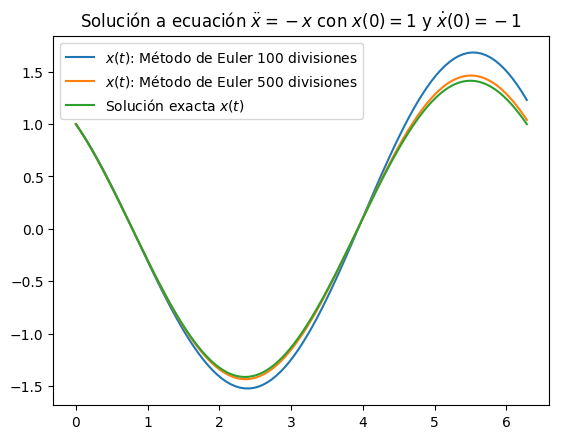

In [27]:
plot(c1,E11,label=L"$x(t)$: Método de Euler 100 divisiones")#graficamos la solución en x
plot(c2,E21,label=L"$x(t)$: Método de Euler 500 divisiones")
t=linspace(0,2*pi,1000)
plot(t,X.(t),label=L"Solución exacta $x(t)$")
title(L"Solución a ecuación $\ddot{x}=-x$ con $x(0)=1$ y $\dot{x}(0)=-1$")
legend()
show();

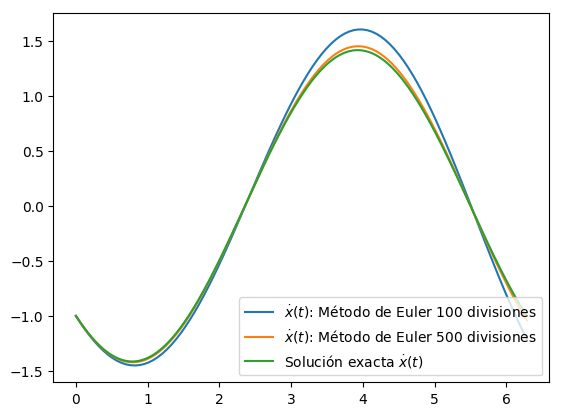

In [28]:
plot(c1,E12,label=L"$\dot{x}(t)$: Método de Euler 100 divisiones")#graficamos soluciones en v
plot(c2,E22,label=L"$\dot{x}(t)$: Método de Euler 500 divisiones")
plot(t,V.(t),label=L"Solución exacta $\dot{x}(t)$")
legend()
show();

In [29]:
d1=linspace(0,2*pi,10)
d2=linspace(0,2*pi,50)
R1=RK_4(f,d1,[1,-1])
R2=RK_4(f,d2,[1,-1])
R1x=map(x->x[1],R1)
R1v=map(x->x[2],R1)
R2x=map(x->x[1],R2)
R2v=map(x->x[2],R2)

50-element Array{Real,1}:
 -1        
 -1.11967  
 -1.22095  
 -1.30218  
 -1.36204  
 -1.39952  
 -1.41403  
 -1.40532  
 -1.37354  
 -1.3192   
 -1.2432   
 -1.14678  
 -1.03154  
  ⋮        
  0.827593 
  0.674153 
  0.509644 
  0.336766 
  0.158358 
 -0.0226493
 -0.203285 
 -0.380583 
 -0.551632 
 -0.713623 
 -0.863896 
 -0.999984 

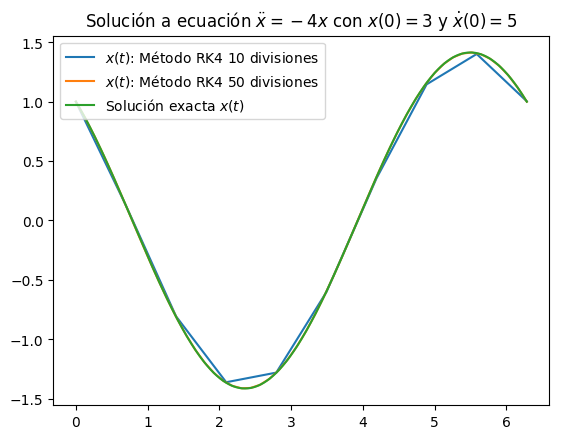

In [30]:
plot(d1,R1x,label=L"$x(t)$: Método RK4 10 divisiones")
plot(d2,R2x,label=L"$x(t)$: Método RK4 50 divisiones")
t=linspace(0,2*pi,1000)
plot(t,X.(t),label=L"Solución exacta $x(t)$")
title(L"Solución a ecuación $\ddot{x}=-4x$ con $x(0)=3$ y $\dot{x}(0)=5$")
legend()
show();

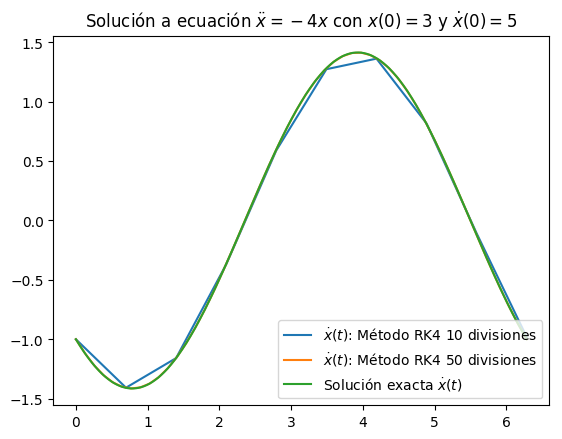

In [31]:
plot(d1,R1v,label=L"$\dot{x}(t)$: Método RK4 10 divisiones")
plot(d2,R2v,label=L"$\dot{x}(t)$: Método RK4 50 divisiones")
plot(t,V.(t),label=L"Solución exacta $\dot{x}(t)$")
title(L"Solución a ecuación $\ddot{x}=-4x$ con $x(0)=3$ y $\dot{x}(0)=5$")
legend()
show();

es evidente que mientras que con el método de euler aún con 500 divisiones se notan diferentes las soluciones aproximadas de la real, en cambio en el método de Runge-Kutta bastó con 50 para que ya no se notaran

La energía total en el oscilador armónico es:
$$E=\frac{1}{2}m\dot{x}^{2}(t)+\frac{1}{2}kx^{2}(t),$$
pero dado que la energía se conserva, basta con calcular dicha energía en $t=0$, es decir, aplicar condiciones iniciales
$m=1\:\mathrm{kg}$ y $k=1\:\mathrm{N/m}$ $E=\displaystyle 1\:\mathrm{J}$.

In [32]:
Energía(t)=1#definimos la función energía 

Energía (generic function with 1 method)

In [40]:
EnergiaE1=0.5*(E12.^2+E11.^2)#construimos las energías para cada caso
EnergiaE2=0.5*(E22.^2+E21.^2)
EnergiaR1=0.5*(R1v.^2+R1x.^2)
EnergiaR2=0.5*(R2v.^2+R2x.^2)

50-element Array{Float64,1}:
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 0.999999
 0.999999
 0.999999
 0.999999
 ⋮       
 0.999998
 0.999998
 0.999998
 0.999997
 0.999997
 0.999997
 0.999997
 0.999997
 0.999997
 0.999997
 0.999997
 0.999997

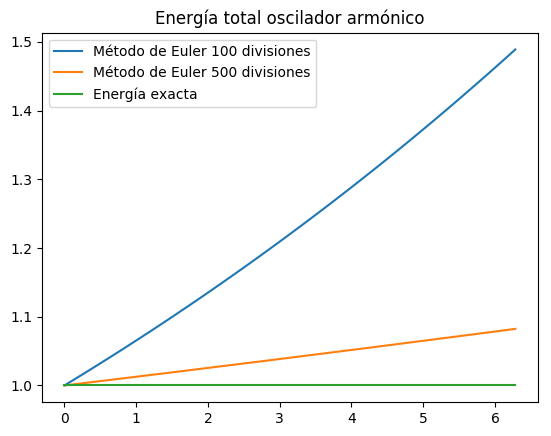

In [38]:
plot(c1,EnergiaE1,label="Método de Euler 100 divisiones")
plot(c2,EnergiaE2,label="Método de Euler 500 divisiones")
t=linspace(0,2*pi,1000)
plot(t,Energía.(t),label="Energía exacta")
title("Energía total oscilador armónico")
legend()
show();

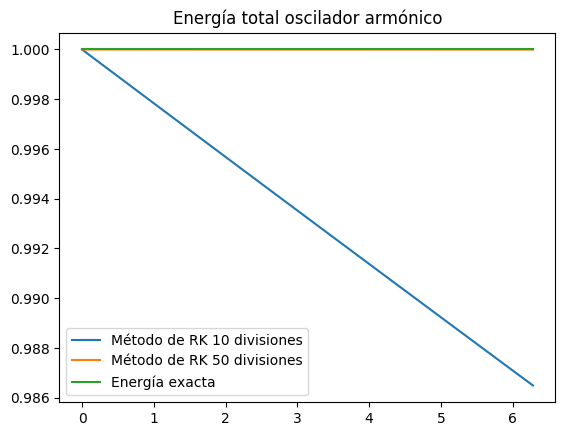

In [41]:
plot(d1,EnergiaR1,label="Método de RK 10 divisiones")
plot(d2,EnergiaR2,label="Método de RK 50 divisiones")
t=linspace(0,2*pi,1000)
plot(t,Energía.(t),label="Energía exacta")
title("Energía total oscilador armónico")
legend()
show();

de nuevo se nota que con menos divisiones, el metodo RK se aproxima de manera casi exacta a lo real y además como se puede ver , la diferencia entre 10 y 50 divisiones es abismal

vamos ahora a graficar en el espacio de fases los ajustes, para ello usaremos 

In [50]:
qe1=linspace(0,2*pi,100)           # consideramos 100 divisiones
qE1=euler(f,[1,-1],qe1)
qEx1=map(x->x[1],qE1)
qEv1=map(x->x[2],qE1)
qe2=linspace(0,2*pi,500)           # consideramos 500 divisiones
qE2=euler(f,[1,-1],qe2)
qEx2=map(x->x[1],qE2)
qEv2=map(x->x[2],qE2)

500-element Array{Real,1}:
 -1       
 -1.01259 
 -1.02502 
 -1.0373  
 -1.04941 
 -1.06135 
 -1.07313 
 -1.08474 
 -1.09618 
 -1.10745 
 -1.11855 
 -1.12947 
 -1.14021 
  ⋮       
 -0.885595
 -0.900368
 -0.915001
 -0.929492
 -0.943837
 -0.958035
 -0.972083
 -0.985979
 -0.999722
 -1.01331 
 -1.02673 
 -1.04    

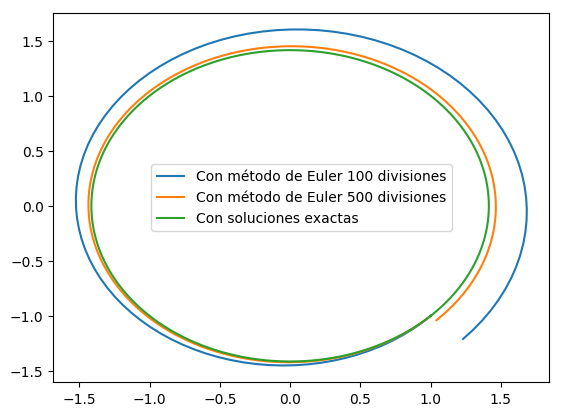

In [54]:
plot(qEx1,qEv1,label="Con método de Euler 100 divisiones");
plot(qEx2,qEv2,label="Con método de Euler 500 divisiones");
t = linspace(0,2*pi,1000)
plot(X.(t),V.(t),label="Con soluciones exactas");
legend()
show();

In [52]:
qR=RK_4(f,qe,[1,-1])
qRx=map(x->x[1],qR)
qRv=map(x->x[2],qR)

30-element Array{Real,1}:
 -1        
 -1.19159  
 -1.32746  
 -1.40126  
 -1.40955  
 -1.35192  
 -1.23109  
 -1.05269  
 -0.825076 
 -0.558881 
 -0.266554 
  0.0382349
  0.341236 
  ⋮        
  1.41367  
  1.38888  
  1.29914  
  1.14866  
  0.94447  
  0.696121 
  0.415223 
  0.114912 
 -0.190773 
 -0.487537 
 -0.761504 
 -0.999866 

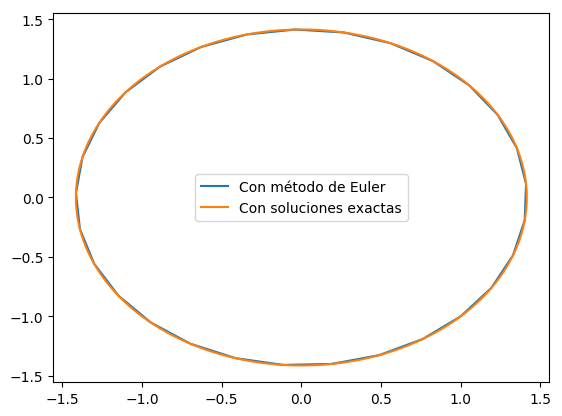

In [49]:
plot(qRx,qRv,label="Con método de Euler");
t = linspace(0,2*pi,1000)
plot(X.(t),V.(t),label="Con soluciones exactas");
legend()
show();

de nuevo la diferencia es abismal entre ambos métodos, en RK con 30 basto para que fuera muy pegada a la original, pero para euler ni con 500 bastó para obtener algo parecido a lo que se ve en RK

Finalmente se grafican distintas condiciones iniciales en el espacio fase

In [64]:
RK=linspace(0,2*pi,500)
Rk11x=map(x->x[1],RK_4(f,RK,[1,1]))  # x(0)=1 v(0)=1
Rk11v=map(x->x[2],RK_4(f,RK,[1,1]))
Rk12x=map(x->x[1],RK_4(f,RK,[1,2]))  # x(0)=1 v(0)=2
Rk12v=map(x->x[2],RK_4(f,RK,[1,2]))  
Rk21x=map(x->x[1],RK_4(f,RK,[2,1]))  # x(0)=2 v(0)=1
Rk21v=map(x->x[2],RK_4(f,RK,[2,1]))  
Rk22x=map(x->x[1],RK_4(f,RK,[2,2]))  # x(0)=2 v(0)=2
Rk22v=map(x->x[2],RK_4(f,RK,[2,2]))
Rk32x=map(x->x[1],RK_4(f,RK,[3,2]))  # x(0)=3 v(0)=2
Rk32v=map(x->x[2],RK_4(f,RK,[3,2]))
Rk23x=map(x->x[1],RK_4(f,RK,[2,3]))  # x(0)=2 v(0)=3
Rk23v=map(x->x[2],RK_4(f,RK,[2,3]))
Rk33x=map(x->x[1],RK_4(f,RK,[3,3]))  # x(0)=3 v(0)=3
Rk33v=map(x->x[2],RK_4(f,RK,[3,3]))
Rk31x=map(x->x[1],RK_4(f,RK,[3,1]))  # x(0)=3 v(0)=1
Rk31v=map(x->x[2],RK_4(f,RK,[3,1]))
Rk13x=map(x->x[1],RK_4(f,RK,[1,3]))  # x(0)=1 v(0)=3
Rk13v=map(x->x[2],RK_4(f,RK,[1,3]))

500-element Array{Real,1}:
 3      
 2.98717
 2.97387
 2.96009
 2.94585
 2.93114
 2.91597
 2.90033
 2.88423
 2.86768
 2.85067
 2.8332 
 2.81529
 ⋮      
 3.10933
 3.10183
 3.09384
 3.08535
 3.07638
 3.06692
 3.05697
 3.04654
 3.03563
 3.02423
 3.01235
 3.0    

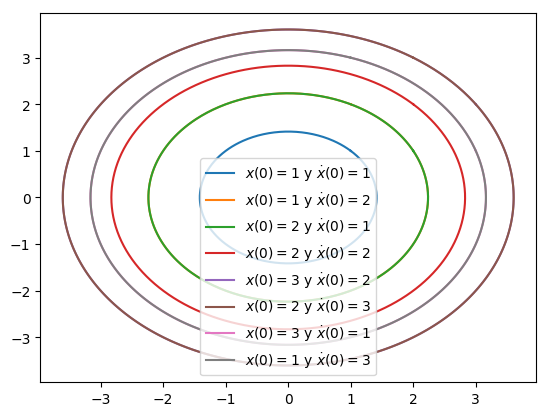

In [65]:
plot(Rk11x,Rk11v,label=L"$x(0)=1$ y $\dot{x}(0)=1$");
plot(Rk12x,Rk12v,label=L"$x(0)=1$ y $\dot{x}(0)=2$");
plot(Rk21x,Rk21v,label=L"$x(0)=2$ y $\dot{x}(0)=1$");
plot(Rk22x,Rk22v,label=L"$x(0)=2$ y $\dot{x}(0)=2$");
plot(Rk32x,Rk32v,label=L"$x(0)=3$ y $\dot{x}(0)=2$");
plot(Rk23x,Rk23v,label=L"$x(0)=2$ y $\dot{x}(0)=3$");
plot(Rk31x,Rk31v,label=L"$x(0)=3$ y $\dot{x}(0)=1$");
plot(Rk13x,Rk13v,label=L"$x(0)=1$ y $\dot{x}(0)=3$");
legend()
show();